## Train ESN on ENSO TDE data

reproduce work from project

In [1]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [2]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project

┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt C:\Users\lisah\.julia\packages\Flux\9PibT\ext\FluxCUDAExt\FluxCUDAExt.jl:10


In [3]:
# read input data into dictionary
data = Dict()

data["full"] = CSV.read("data/sst_data/sst_34_anomaly_embedded.txt", DataFrame; delim=',', ignorerepeated=true, header=false)
data["train_data_80"] = CSV.read("data/sst_34_data_split_80/train_sst_34_anomaly_embedded_80.txt", DataFrame; delim=',', ignorerepeated=true)
data["test_data_80"] = CSV.read("data/sst_34_data_split_80/test_sst_34_anomaly_embedded_80.txt", DataFrame; delim=',', ignorerepeated=true)
data["val_data_80"] = CSV.read("data/sst_34_data_split_80/val_sst_34_anomaly_embedded_80.txt", DataFrame; delim=',', ignorerepeated=true)

# bring into correct format
data["full"] = Matrix(transpose(Matrix(data["full"])))
data["train_data_80"] = Matrix(transpose(Matrix(data["train_data_80"])))
data["test_data_80"] = Matrix(transpose(Matrix(data["test_data_80"])))
data["val_data_80"] = Matrix(transpose(Matrix(data["val_data_80"])))

data

Dict{Any, Any} with 4 entries:
  "full"          => [0.08 -0.2 … -0.84 -0.69; 0.27 0.86 … 0.88 1.07; … ; -0.33…
  "train_data_80" => [0.08 -0.2 … 0.43 0.75; 0.27 0.86 … 0.82 0.83; … ; -0.33 -…
  "val_data_80"   => [0.63 0.51 … 0.86 0.9; 1.02 1.26 … 0.75 0.6; … ; 0.02 -0.4…
  "test_data_80"  => [0.67 0.71 … -0.84 -0.69; 0.42 0.15 … 0.88 1.07; … ; -0.14…

In [4]:
spectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.1, 0.14]
input_scales = [0.1, 1.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [ 130]

param_grid_80 = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

In [5]:
esn_80, W_out_80, val_loss_80 = enso_project.cross_validate_esn(data["train_data_80"], data["val_data_80"], param_grid_80)

enso_project.ESNHyperparams(130, 0.8, 0.05, 0.1, 0.0)
Validation loss = 223240.07414745248
enso_project.ESNHyperparams(130, 0.9, 0.05, 0.1, 0.0)
Validation loss = 174.46448252285768
enso_project.ESNHyperparams(130, 0.8, 0.1, 0.1, 0.0)
Validation loss = 148.9947908736235
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 30.50979942909385
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 1.0e-6)
Validation loss = 30.49596650913812
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 1.0e-5)
Validation loss = 30.42386160998865


(ESN(5 => 130), OutputLayer successfully trained with output size: 5, 30.42386160998865)

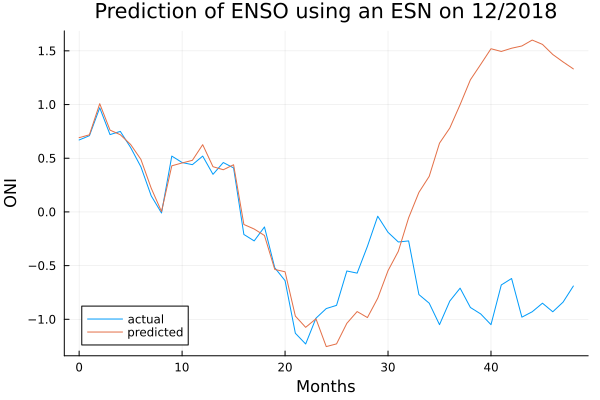

In [6]:
enso_project.plot_esn_prediction(esn_80, W_out_80, data["test_data_80"], "12/2018")

### Start prediction from later time steps

note: previous validation set starts at index 398. Test set starts at index 444 (i.e. December)

In [7]:
# store predictions
predictions = zeros(6, size(data["test_data_80"], 2));

method: keep training set fixed, change fraction of validation set to test set and retrain network.

In [8]:
pectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.08,0.1, 0.12, 0.14, 0.2]
input_scales = [0.1, 0.5, 1.0, 2.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [90, 110, 120, 125, 130, 135, 140, 150, 160, 180, 190, 200, 210]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

In [9]:
#Feb
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:446], param_grid)
predictions[1,1:size(data["full"][:, 447:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 447:end]);

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 154.30667258360774
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 119.15047492174462
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 0.0)
Validation loss = 79.70962171708058
enso_project.ESNHyperparams(90, 1.0, 0.1, 0.1, 0.0)
Validation loss = 68.65943735419619
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 60.7458998729612
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 1.0e-5)
Validation loss = 60.10794020995568


In [10]:
#Apr
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:448], param_grid)
predictions[2,1:size(data["full"][:, 449:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 449:end]);

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 165.87994540322228
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 123.96986411395909
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 0.0)
Validation loss = 83.34473548952428
enso_project.ESNHyperparams(90, 1.0, 0.1, 0.1, 0.0)
Validation loss = 73.02386701909714
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 62.880409149310594


In [11]:
#Jun
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:450], param_grid)
predictions[3,1:size(data["full"][:, 451:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 451:end]);

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 174.37537956734903
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 127.76079122160414
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 0.0)
Validation loss = 90.48778748149556
enso_project.ESNHyperparams(90, 1.0, 0.1, 0.1, 0.0)
Validation loss = 77.02281794430806
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 65.21368510122664


In [12]:
#Aug
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:452], param_grid)
predictions[4,1:size(data["full"][:, 453:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 453:end]);

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 182.8622257003172
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 131.4750793711897
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 0.0)
Validation loss = 96.12217082252263
enso_project.ESNHyperparams(90, 1.0, 0.1, 0.1, 0.0)
Validation loss = 80.44845352649689
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 66.98180656096152


In [13]:
#Oct
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:454], param_grid)
predictions[5,1:size(data["full"][:, 455:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 455:end]);

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 192.82361437190806
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 137.35075761564755
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 0.0)
Validation loss = 100.74030689423154
enso_project.ESNHyperparams(90, 1.0, 0.1, 0.1, 0.0)
Validation loss = 85.03079760588162
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 70.43546345377455


In [14]:
#Dec
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:456], param_grid)
predictions[6,1:size(data["full"][:, 457:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 457:end]);

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 200.26968205513148
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 143.08956613686416
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 0.0)
Validation loss = 111.07175748253651
enso_project.ESNHyperparams(90, 1.0, 0.1, 0.1, 0.0)
Validation loss = 90.86141265175377
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 77.06680827452278


In [15]:
predictions = predictions[:, 1:37] #make all same length
reference_data = data["full"][:, 445:end];

### Compare plots

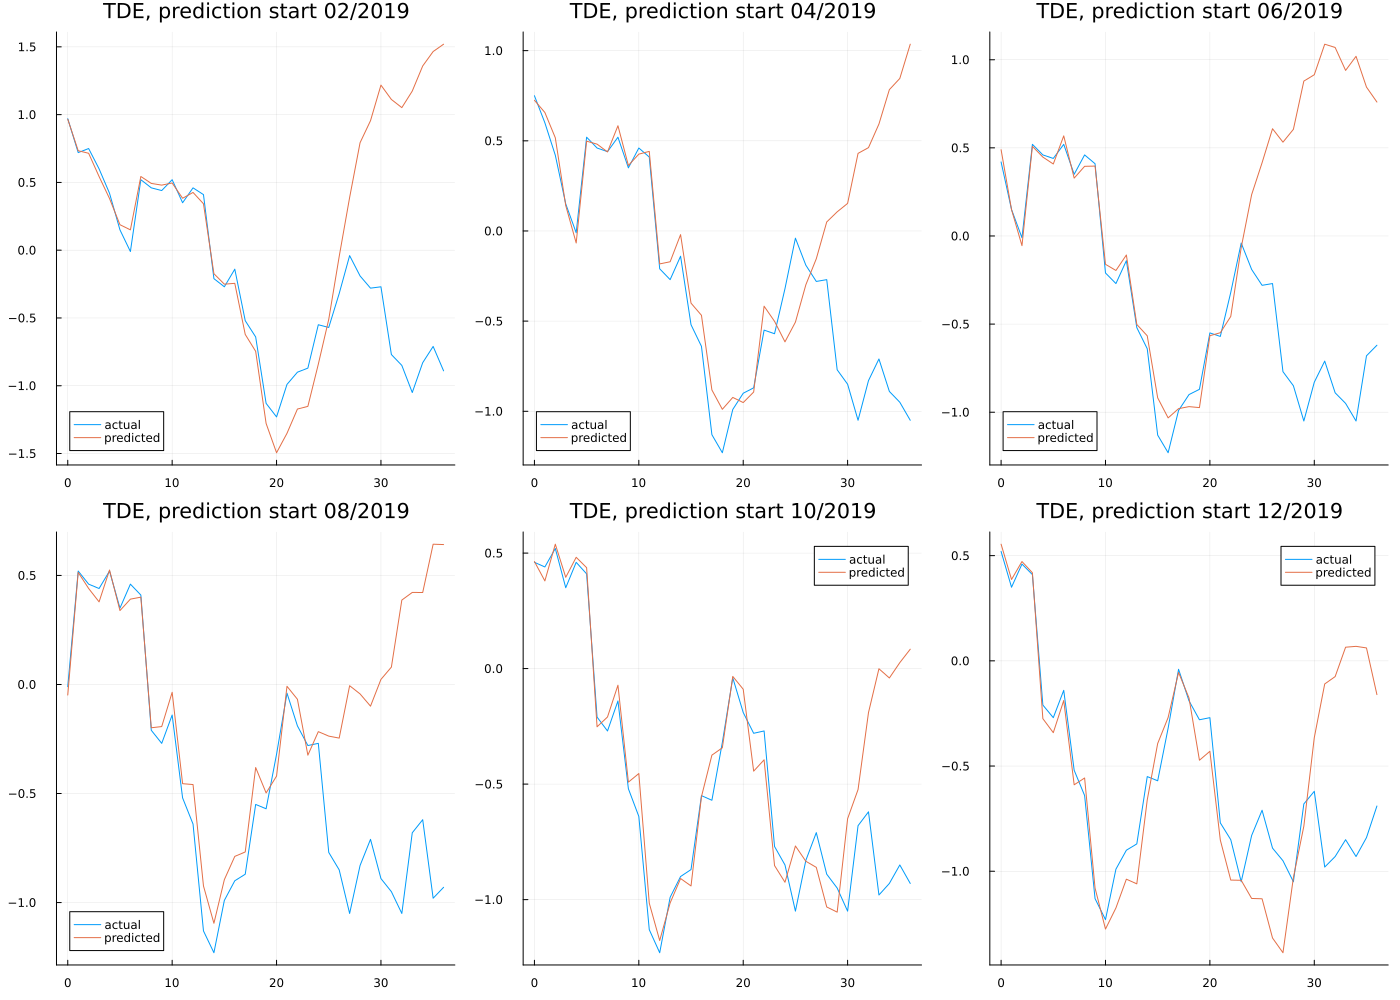

In [16]:
months = ["02/2019","04/2019","06/2019","08/2019","10/2019","12/2019"]
add = [2,4,6,8,10,12]
subplots = []
label = ["actual" "predicted"]
times =  collect(0:36)
for i in eachindex(predictions[:,1])
    m = months[i]
    a = add[i]
    push!(subplots, plot(times, [reference_data[1, a+1 :a+37], predictions[i, :]], label=label,  title="TDE, prediction start $m"))
end
plot(subplots..., layout=(2,3), size=(1400,1000))